In [6]:
import numpy as np
from fireballpy import Fireball
from ase import Atoms
from ase.eos import EquationOfState
from ase.units import kJ

In [7]:
avec = np.linspace(5.0, 6.0, num=11)
etot = np.empty_like(avec)
vol = np.empty_like(avec)
for i, a in enumerate(avec):
    atoms = Atoms(symbols=['Si', 'Si'],
                  positions=[(0.0, 0.0, 0.0),
                             (a/4, a/4, a/4)])  
    atoms.set_cell([(a/2, a/2, 0), (a/2, 0, a/2), (0, a/2, a/2)])
    atoms.calc = Fireball(fdata='Si', charges_method='mulliken_dipole_preserving', kpts=(4, 4, 4))
    etot[i] = atoms.get_potential_energy()
    vol[i] = atoms.get_volume()

In [8]:
eos = EquationOfState(vol, etot)
v0, e0, B = eos.fit()

print(f'B = {B / kJ * 1.0e24:.2f} GPa')
print(f'V = {v0:.2f} \u00C5\u00B3')
a = (v0 * 4) ** (1/3)
print(f'a = {a:.2f} \u00C5')
print(f'E = {e0:.2f} eV')

#charges_method = mdp
#B = 93.95 GPa
#V = 40.73 Å³
#a = 5.46 Å
#E = -211.82 eV

B = 94.75 GPa
V = 40.92 Å³
a = 5.47 Å
E = -211.77 eV


<Axes: title={'center': 'sj: E: -211.766 eV, V: 40.917 Å$^3$, B: 94.753 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

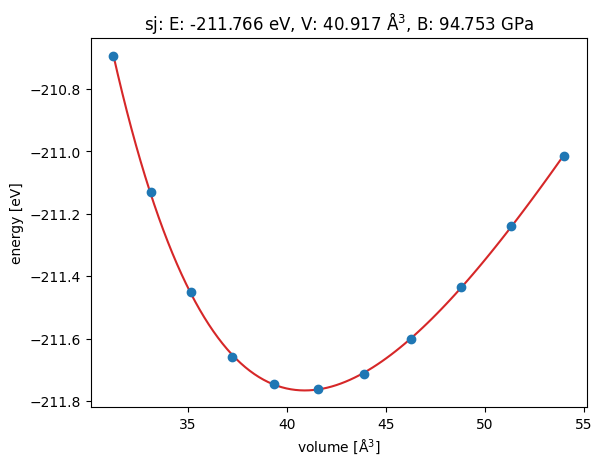

In [9]:
eos.plot()

In [10]:
atoms = Atoms(symbols=['Si', 'Si'],
            positions=[( 0.0000, 0.0000, 0.0000),
                       (    a/4,    a/4,    a/4)])  
atoms.set_cell([(a/2, a/2, 0), (a/2, 0, a/2), (0, a/2, a/2)])
        
atoms.calc = Fireball(fdata='Si', charges_method='mulliken_dipole_preserving', kpts=(4, 4, 4))
atoms.get_potential_energy()
atoms.get_charges()

print(atoms.calc.results['energy'])
print(atoms.calc.results['shell_charges'])

-211.76286987646398
[[1.46128298 2.41885052 0.11987136]
 [1.46128022 2.41882851 0.11988641]]


In [11]:
atoms.calc.get_charges()

array([-4.85886015e-06,  4.85886015e-06])